This datasets contains tonnes of emissions per person per year.

- Dataset url: https://ec.europa.eu/eurostat/databrowser/view/sdg_13_10__custom_19333830/default/table
- Dataset options
    - Geopolitical entity (reporting): All (29/29)
    - Source sectors for greenhouse gas emissions (Common reporting format, UNFCCC)
      - Total (excluding memo items): True
      - Total (excluding LULUCF and memo items): False
    - Time: 1990-2023 (34/34)
    - Time frequency: Annual
    - Unit of measure: Tonnes per capita

- Download options
    - File format: SDMX-CSV 1.0 (.csv)
    - Data scope
    - Include non-available data: False
    - Compress file (.gzip): False
- File path: data/emissions.csv

In [5]:
# TimeSeries can now load CSV data directly
using TimeSeriesKit
using Plots

Time Series length: 34
Years: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Emissions data: Float32[11.6, 11.4, 11.6, 11.4, 11.2, 11.0, 10.9, 10.6, 9.7, 9.4, 9.3, 9.4, 8.9, 9.2, 9.1, 9.1, 9.7, 9.8, 9.6, 9.2, 9.7, 9.5, 9.3, 9.1, 9.0, 9.2, 9.3, 9.6, 9.7, 9.6, 9.3, 10.1, 9.4, 8.6]


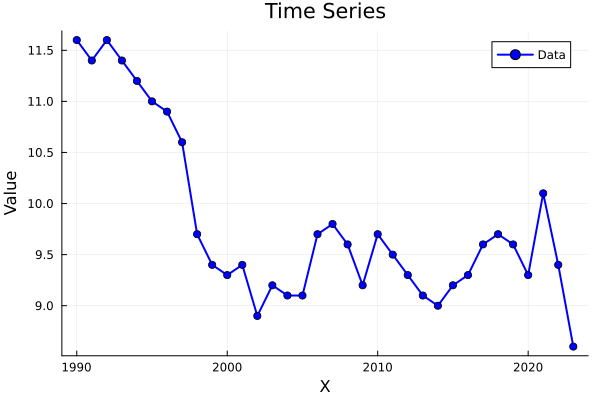

In [6]:
# Create TimeSeries for Czechia - loads CSV internally
ts = TimeSeries("data/emissions.csv", "Poland")

println("Time Series length: $(length(ts))")
println("Years: $(ts.timestamps)")
println("Emissions data: $(ts.values)")
plot_timeseries(ts)

Model fitted: true
Parameters: Dict{Symbol, Any}(:intercept => 338.0212136408451, :slope => -0.16197096589276327)
RMSE: 0.8886703464954512


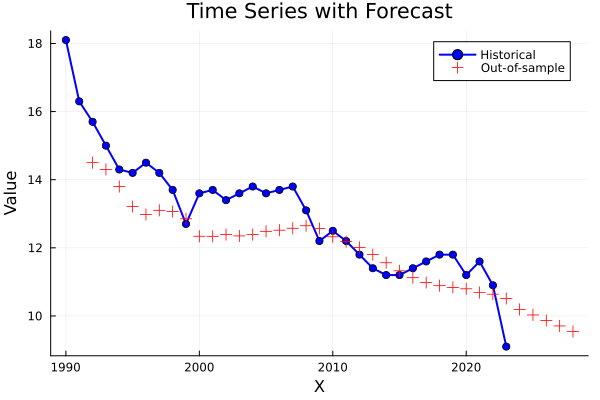

In [22]:
# Example: Using the TimeSeries with TimeSeriesKit models

# Load TimeSeries directly from CSV
ts = TimeSeries("data/emissions.csv", "Czechia")

# Fit a Linear model
linear = LinearModel()
fit(linear, ts)

println("Model fitted: $(is_fitted(linear))")
println("Parameters: $(get_parameters(linear))")

predictions = iterative_predict(linear, ts, 5)
println("RMSE: $(rmse(ts, predictions))")

plot_timeseries(ts, predictions)

Model fitted: true
Parameters: Dict{Symbol, Any}(:alpha => 0.99, :level => 9.118069979915855)
RMSE: 0.5618688153838098


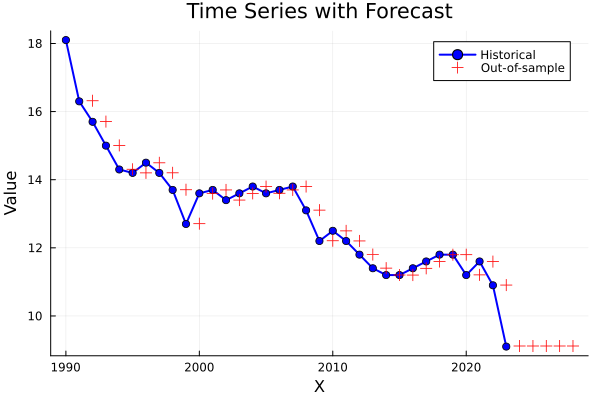

In [8]:
# Example: Using the TimeSeries with TimeSeriesKit models

# Load TimeSeries directly from CSV
ts = TimeSeries("data/emissions.csv", "Czechia")

# Fit a Linear model
ses = SESModel()
fit(ses, ts)

println("Model fitted: $(is_fitted(ses))")
println("Parameters: $(get_parameters(ses))")

predictions = iterative_predict(ses, ts, 5)
println("RMSE: $(rmse(ts, predictions))")

plot_timeseries(ts, predictions)

In [13]:
methods(cross_validate)

# 2 methods for generic function "cross_validate" from TimeSeriesKit.Evaluation:
 [1] cross_validate(model::AbstractTimeSeriesModel, ts::TimeSeries, n_splits::Int64; verbose)
     @ ~/me/uni/B0B36JUL/B0B36JUL/TimeSeriesKit/src/evaluation/metrics.jl:125
 [2] cross_validate(model::AbstractTimeSeriesModel, ts::TimeSeries; ...)
     @ ~/me/uni/B0B36JUL/B0B36JUL/TimeSeriesKit/src/evaluation/metrics.jl:125

In [ ]:
cross_validate(ses, ts, verbose=true)

Split 1: Train len: 10, Test len: 5
  RMSE: 0.9196, MAE: 0.9099
Split 2: Train len: 15, Test len: 5
  RMSE: 0.7861, MAE: 0.5188
Split 3: Train len: 20, Test len: 5
  RMSE: 0.6205, MAE: 0.5054
Split 4: Train len: 25, Test len: 5
  RMSE: 0.4272, MAE: 0.3588
Split 5: Train len: 30, Test len: 4
  RMSE: 1.4577, MAE: 1.1


(mean_rmse = 0.8422133459909311, std_rmse = 0.3903083912624992, mean_mae = 0.6785872197739818, std_mae = 0.3118071387532378, cv_scores = [0.9195699989837162, 0.7860685608671755, 0.6204638686216652, 0.4272415392907946, 1.457722762191304])

In [40]:
cross_validate(linear, ts, 5; verbose=true)

Split 1: Train len: 10, Test len: 5
  RMSE: 2.31, MAE: 2.2
Split 2: Train len: 15, Test len: 5
  RMSE: 1.3392, MAE: 1.2874
Split 3: Train len: 20, Test len: 5
  RMSE: 0.2839, MAE: 0.2449
Split 4: Train len: 25, Test len: 5
  RMSE: 0.7722, MAE: 0.6492
Split 5: Train len: 30, Test len: 4
  RMSE: 0.8271, MAE: 0.7518


(mean_rmse = 1.1064692426041685, std_rmse = 0.769573818003976, mean_mae = 1.0266582949441687, std_mae = 0.7539664705891037, cv_scores = [2.3099786218553415, 1.3391769749639677, 0.2839239685501857, 0.7721520501156046, 0.8271145975357433])

In [ ]:
configs = Dict(
    LinearModel => Dict(),  # No parameters to tune
    SESModel => Dict(:alpha => [0.1, 0.3, 0.5, 0.7, 0.9])
)
result = grid_search(configs, ts, 5, verbose=true)


Testing model: SESModel

Testing: 
✓ Score: 0.8422

Testing model: LinearModel

Testing: 
✓ Score: 1.1065

Grid Search Complete!
Best Model: SESModel
Best Parameters: Dict{Any, Any}()
Best RMSE: 0.8422


(best_model = SESModel(nothing, ModelState(Dict{Symbol, Any}(), nothing, nothing, false)), best_score = 0.8422133459909311, best_params = Dict{Any, Any}(), results_df = 2×6 DataFrame
 Row │ model        mean_rmse  std_rmse  mean_mae  std_mae   params  
     │ String       Float64    Float64   Float64   Float64   String  
─────┼───────────────────────────────────────────────────────────────
   1 │ SESModel      0.842213  0.390308  0.678587  0.311807  default
   2 │ LinearModel   1.10647   0.769574  1.02666   0.753966  default)